In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.ensemble import IsolationForest
from ucimlrepo import fetch_ucirepo

In [4]:
air_quality=fetch_ucirepo(id=360)
print(air_quality)

{'data': {'ids': None, 'features':            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     3/10/2004  18:00:00     2.6         1360       150      11.9   
1     3/10/2004  19:00:00     2.0         1292       112       9.4   
2     3/10/2004  20:00:00     2.2         1402        88       9.0   
3     3/10/2004  21:00:00     2.2         1376        80       9.2   
4     3/10/2004  22:00:00     1.6         1272        51       6.5   
...         ...       ...     ...          ...       ...       ...   
9352   4/4/2005  10:00:00     3.1         1314      -200      13.5   
9353   4/4/2005  11:00:00     2.4         1163      -200      11.4   
9354   4/4/2005  12:00:00     2.4         1142      -200      12.4   
9355   4/4/2005  13:00:00     2.1         1003      -200       9.5   
9356   4/4/2005  14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056      113    

In [5]:
data=air_quality.data.features
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [6]:
df=data[['CO(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']]
df.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116


In [8]:
df.isnull().sum()

CO(GT)      0
C6H6(GT)    0
NOx(GT)     0
NO2(GT)     0
dtype: int64

In [9]:
df.dtypes

CO(GT)      float64
C6H6(GT)    float64
NOx(GT)       int64
NO2(GT)       int64
dtype: object

In [12]:
n_estimators=100
contamination=0.01
sample_size=256



In [13]:
model = IsolationForest(
    n_estimators=n_estimators,
    contamination=contamination,
    max_samples=sample_size,
    random_state=42
)


In [17]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05, random_state=42)

model.fit(df)

anomaly_labels = model.predict(df)

df.loc[:, 'anomaly'] = anomaly_labels


In [18]:
df['anomaly'].value_counts()

anomaly
 1    8889
-1     468
Name: count, dtype: int64

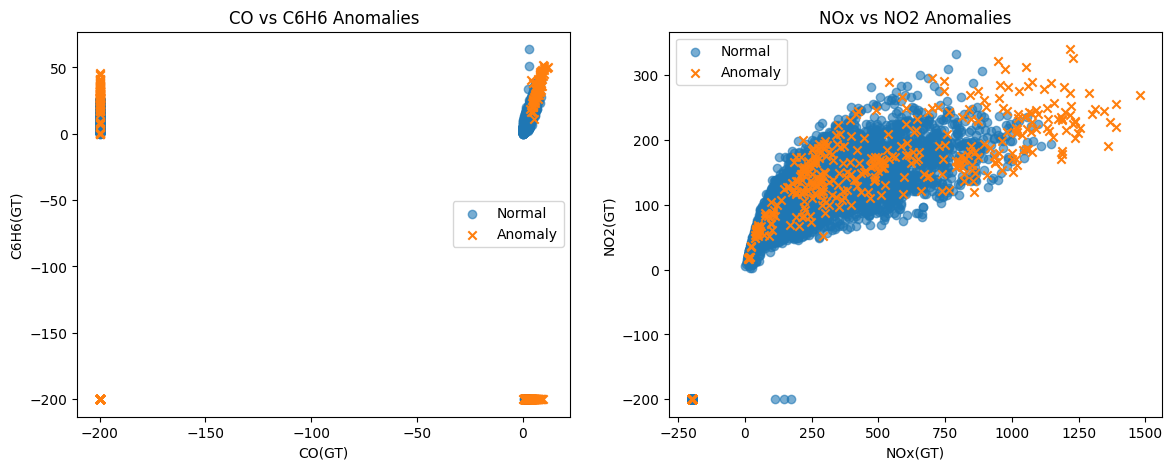

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# ---- select features for anomaly detection ----
features = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
X = df[features].dropna()

# ---- scale ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Isolation Forest ----
model = IsolationForest(contamination=0.05, random_state=42)
labels = model.fit_predict(X_scaled)

# ---- attach labels ----
X.loc[:, 'anomaly'] = labels

# ---- split ----
normal = X[X['anomaly'] == 1]
anomaly = X[X['anomaly'] == -1]

# ---- plotting ----
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: CO vs C6H6
axes[0].scatter(normal['CO(GT)'], normal['C6H6(GT)'],
                label='Normal', alpha=0.6)

axes[0].scatter(anomaly['CO(GT)'], anomaly['C6H6(GT)'],
                label='Anomaly', marker='x')

axes[0].set_xlabel('CO(GT)')
axes[0].set_ylabel('C6H6(GT)')
axes[0].set_title('CO vs C6H6 Anomalies')
axes[0].legend()

# Plot 2: NOx vs NO2
axes[1].scatter(normal['NOx(GT)'], normal['NO2(GT)'],
                label='Normal', alpha=0.6)

axes[1].scatter(anomaly['NOx(GT)'], anomaly['NO2(GT)'],
                label='Anomaly', marker='x')

axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].set_title('NOx vs NO2 Anomalies')
axes[1].legend()

plt.show()


In [21]:
import joblib
joblib.dump(model,'isolation_forest_air_quality.pkl')

['isolation_forest_air_quality.pkl']

In [25]:
model_path="C:\\Users\\Srin\\OneDrive\\ドキュメント\\Unsupervised_Learning\\Anamoly_Detection\\isolation_forest_air_quality.pkl"
#joblib.dump(model,model_path)
saved_files = joblib.dump(model, model_path)
print(saved_files)


['C:\\Users\\Srin\\OneDrive\\ドキュメント\\Unsupervised_Learning\\Anamoly_Detection\\isolation_forest_air_quality.pkl']
